In [46]:
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams.update({"axes.grid":True,"grid.color":"black","grid.alpha":"0.25","grid.linestyle":"--"})
plt.rcParams.update({'font.size': 14})

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Question 1

In [47]:
from Opgave1Nikolas import InauguralprojectClass

In [48]:
model = InauguralprojectClass()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


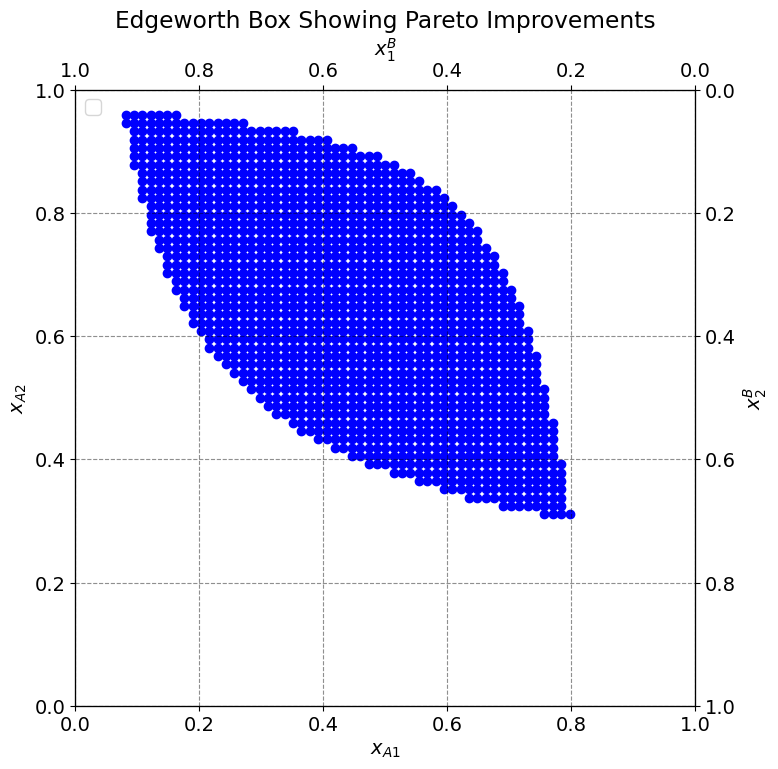

In [49]:
N = 75
x_grid = np.linspace(0, 1, N)

uA_initial = model.utility_A(model.w1A, model.w2A)
uB_initial = model.utility_B(model.w1B, model.w2B)

pareto_set = []

# Checking each combination in the grid for Pareto improvements
for xA1 in x_grid:
    for xA2 in x_grid:
        xB1 = 1 - xA1
        xB2 = 1 - xA2
        
        # Calculating utilities for the new allocations
        uA_new = model.utility_A(xA1, xA2)
        uB_new = model.utility_B(xB1, xB2)
        
        # Checking if both are at least as well off as with their initial endowments
        if uA_new >= uA_initial and uB_new >= uB_initial:
            pareto_set.append((xA1, xA2))

# Extracting the Pareto improvement allocations
pareto_xA1, pareto_xA2 = zip(*pareto_set) if pareto_set else ([], [])

# Plotting the Edgeworth Box with Pareto improvements
plt.figure(figsize=(8, 8))

# Scatter plot for Pareto improvements for A
plt.scatter(pareto_xA1, pareto_xA2, color='blue', label='Pareto Improvements for A')

# Setting primary axis labels for A's allocations
plt.xlabel('$x_{A1}$')
plt.ylabel('$x_{A2}$')

# Setting the limits for the primary axes from 0 to 1
plt.xlim(0, 1)
plt.ylim(0, 1)

# Creating secondary axes for B's allocations
ax2 = plt.twiny()  # Create a second x-axis sharing the same y-axis
ax3 = plt.twinx()  # Create a second y-axis sharing the same x-axis

# Setting the limits for the secondary axes from 0 to 1
ax2.set_xlim(0, 1)
ax3.set_ylim(0, 1)

# Setting labels for B's allocations, which are complements to A's allocations
ax2.set_xlabel('$x_1^B$')
ax3.set_ylabel('$x_2^B$')

# Inverting the direction of the secondary axes to reflect B's perspective
ax2.xaxis.set_label_position('top') 
ax3.yaxis.set_label_position('right')
ax2.xaxis.tick_top()
ax3.yaxis.tick_right()
ax2.invert_xaxis()
ax3.invert_yaxis()

plt.title('Edgeworth Box Showing Pareto Improvements')
plt.grid(True)
plt.legend(loc='upper left')

plt.show()

# Question 2 and 3

In [50]:
project = InauguralprojectClass()

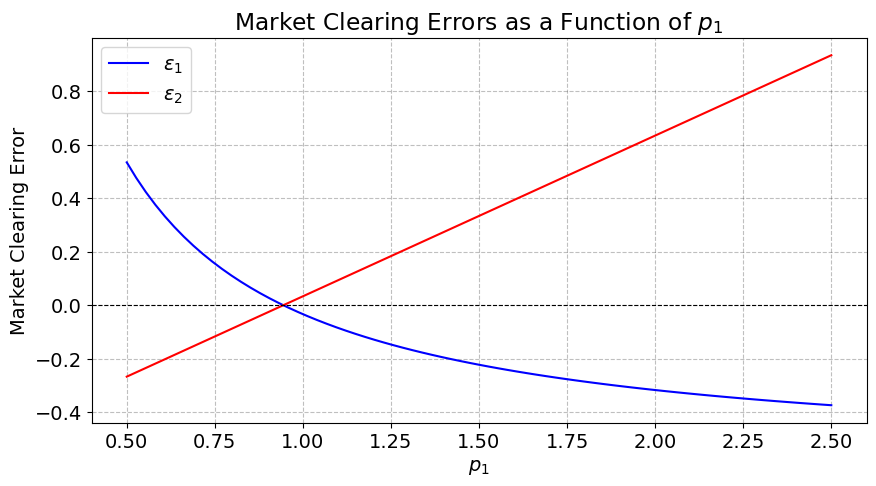

(0, 0.9324324324324325)

In [51]:
#Using N from Question 1
P1 = np.linspace(0.5, 2.5, N)

# Calculate market clearing errors for each p1 in P1
eps1_values = []
eps2_values = []
for p1 in P1:
    eps1, eps2 = project.epsilons(p1)
    eps1_values.append(eps1)
    eps2_values.append(eps2)

# Plotting
plt.figure(figsize=(10, 5))
plt.plot(P1, eps1_values, label='$\\epsilon_1$', color='blue')
plt.plot(P1, eps2_values, label='$\\epsilon_2$', color='red')
plt.title('Market Clearing Errors as a Function of $p_1$')
plt.xlabel('$p_1$')
plt.ylabel('Market Clearing Error')
plt.axhline(0, color='black', linestyle='--', linewidth=0.8)
plt.legend()
plt.grid(True)
plt.show()

# We know that market clearing error should be 0. 
min_abs_eps1 = 0
min_p1_index = np.argmin(np.abs(eps1_values))
min_p1 = P1[min_p1_index]

min_abs_eps1, min_p1